In [1]:
from mlp import train, Dense, Sampler, predict_with_layer_value, predict
from activation_functions import Sigmoid, Mish, Identity, ReLU
from mse import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix, get_config_params, add_noise_to_dataset
from data.font import fontDict
import numpy as np
from plots import *
import matplotlib.pyplot as plt

In [2]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation = get_config_params('./linear_ae.json')

mse_list = []

In [3]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
X = np.reshape(bitmapList,(len(bitmapList), 35, 1))

In [10]:
# El espacio latente es la salida de la "capa 5"
autoencoder = [
    Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    ReLU(),
    Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    ReLU(),
    Sampler(10,2,optimizer_type=optimizer, learning_rate=learning_rate, activation=Identity()),
    Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    ReLU(),
    Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    ReLU(),
    Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
]
error = train(autoencoder, mse, mse_derivative, X, X, epochs=max_epochs, verbose=False)

/Users/ianjamesarnott/Documents/ITBA/TPs-SIA/Tp5/activation_functions.py:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/Users/ianjamesarnott/Documents/ITBA/TPs-SIA/Tp5/mlp.py:108: RuntimeWarning: overflow encountered in exp
  self.sample = self.latent_mean + np.exp(self.latent_log_var / 2.) * self.epsilon
/Users/ianjamesarnott/Documents/ITBA/TPs-SIA/Tp5/activation_functions.py:50: RuntimeWarning: invalid value encountered in multiply
  return x * (x > 0)
/Users/ianjamesarnott/Documents/ITBA/TPs-SIA/Tp5/mlp.py:117: RuntimeWarning: overflow encountered in exp
  log_var_grad["KL"] = (np.exp(self.latent_log_var) - 1) / (2 * aux)
/Users/ianjamesarnott/Documents/ITBA/TPs-SIA/Tp5/mlp.py:121: RuntimeWarning: overflow encountered in exp
  log_var_grad["MSE"] = 0.5 * output_derivative * self.epsilon * np.exp(self.latent_log_var / 2.)


['`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'DEL']


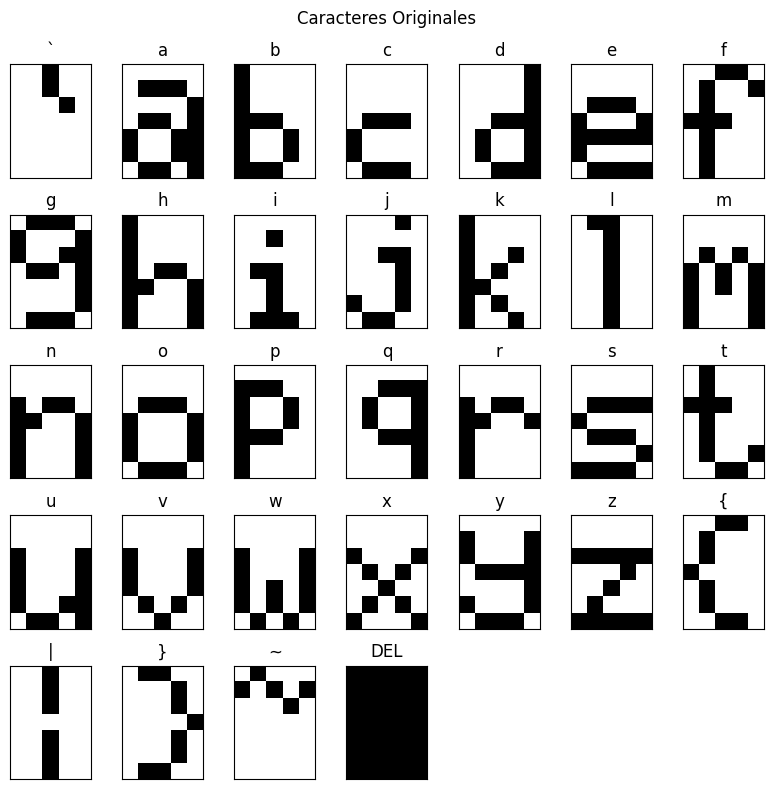

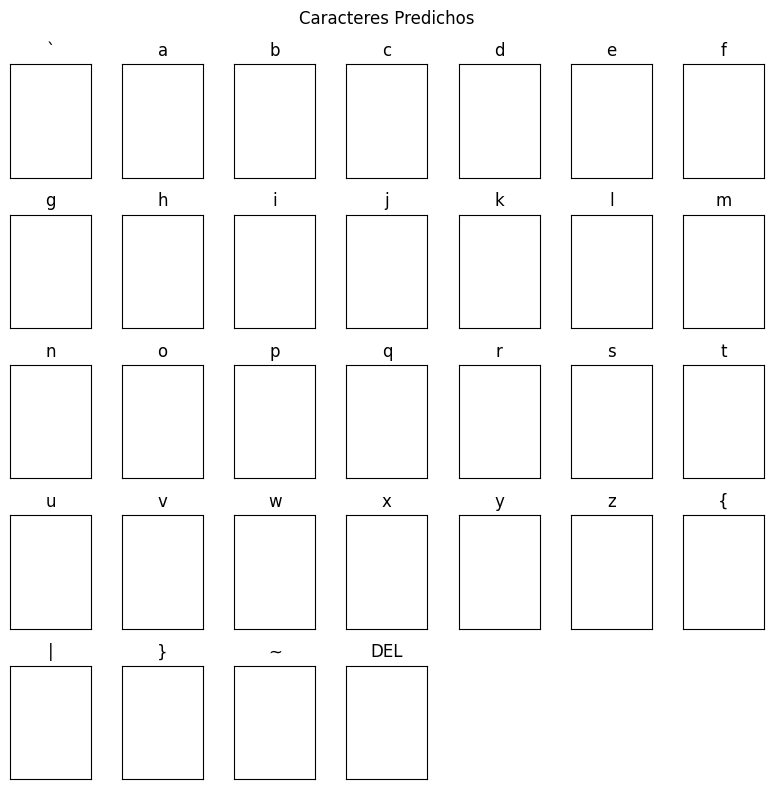

In [11]:
characters = list(bitmapDict.keys())
print(characters)

latent_spaces = []
input_matrix_list = []
output_matrix_list = []
for c in range(len(characters)):
    input_bitmap = []
    output_bitmap = []

    # X es una lista de listas de -listas con un solo elemento-
    for i in range(len(X[c])):
        input_bitmap.append(X[c][i][0])
    input_matrix_list.append(bitmap_as_matrix(input_bitmap))

    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[c], 5)
    latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

    for output in outputs:
        # Para tanh, deberia ser "1 if num[0] > 0 else 0"?
        output_bitmap.append(output[0])
        
    output_matrix_list.append(bitmap_as_matrix(output_bitmap))


plot_bitmap_matrix_2(input_matrix_list, characters, "Caracteres Originales")
plot_bitmap_matrix_2(output_matrix_list, characters, "Caracteres Predichos")
    

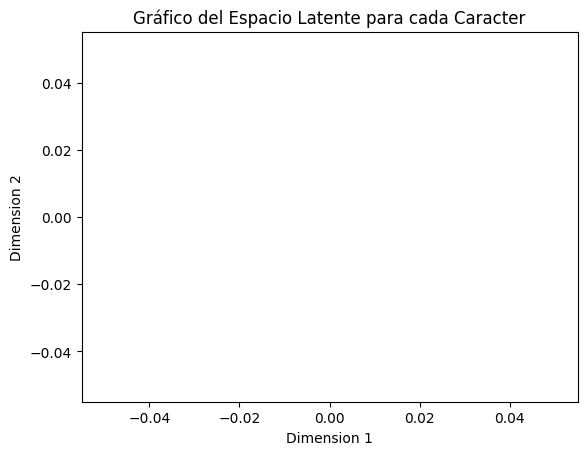

In [12]:
plot_latent_spaces(latent_spaces, characters)